# 中文官方教学

> https://tensorflow.google.cn/tutorials?hl=zh-cn

# 简单示例

In [18]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [7]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


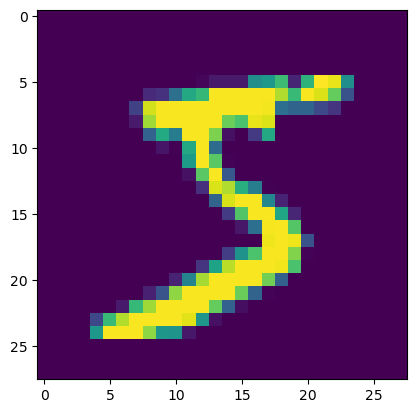

In [12]:
plt.imshow(x_train[0])

# 模型结构

In [30]:

model = keras.models.Sequential([
    keras.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.14928177, -0.40238705, -0.27615222,  0.58684057,  0.27909696,
         0.18149473, -0.34391844,  0.32013017,  0.4631814 , -0.22965406]],
      dtype=float32)

# 训练配置

In [31]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [34]:
loss_fn(y_train[:1], predictions).numpy()

2.250177

In [35]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

# 训练评估

In [36]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 781us/step - accuracy: 0.8505 - loss: 0.4952
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - accuracy: 0.9555 - loss: 0.1516
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.9658 - loss: 0.1109
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 832us/step - accuracy: 0.9729 - loss: 0.0877
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9771 - loss: 0.0720


In [37]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - 537us/step - accuracy: 0.9760 - loss: 0.0768


[0.07677952200174332, 0.9760000109672546]

# 调整模型结构

In [38]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [47]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [46]:
probability_model(x_test[:5]).numpy().argmax(axis=1)

array([7, 2, 1, 0, 4])

In [48]:
tf.keras.losses.SparseCategoricalCrossentropy?

Init signature:
tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False,
    ignore_class=None,
    reduction='sum_over_batch_size',
    name='sparse_categorical_crossentropy',
    dtype=None,
)
Docstring:     
Computes the crossentropy loss between the labels and predictions.

Use this crossentropy loss function when there are two or more label
classes.  We expect labels to be provided as integers. If you want to
provide labels using `one-hot` representation, please use
`CategoricalCrossentropy` loss.  There should be `# classes` floating point
values per feature for `y_pred` and a single floating point value per
feature for `y_true`.

In the snippet below, there is a single floating point value per example for
`y_true` and `num_classes` floating pointing values per example for
`y_pred`. The shape of `y_true` is `[batch_size]` and the shape of `y_pred`
is `[batch_size, num_classes]`.

Args:
    from_logits: Whether `y_pred` is expected to be a logits tensor. By
        de

# 数据放到指定设备上

In [ ]:
import time

def time_matmul(x):
  start = time.time()
  for loop in range(10):
    tf.linalg.matmul(x, x)

  result = time.time()-start

  print("10 loops: {:0.2f}ms".format(1000*result))

# Force execution on CPU
print("On CPU:")
with tf.device("CPU:0"):
  x = tf.random.uniform([1000, 1000])
  assert x.device.endswith("CPU:0")
  time_matmul(x)

# Force execution on GPU #0 if available
if tf.config.list_physical_devices("GPU"):
  print("On GPU:")
  with tf.device("GPU:0"): # Or GPU:1 for the 2nd GPU, GPU:2 for the 3rd etc.
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("GPU:0")
    time_matmul(x)

# 自定义层

In [ ]:
class MyDenseLayer(tf.keras.layers.Layer):
  def __init__(self, num_outputs):
    super(MyDenseLayer, self).__init__()
    self.num_outputs = num_outputs

  def build(self, input_shape):
    self.kernel = self.add_weight("kernel",
                                  shape=[int(input_shape[-1]),
                                         self.num_outputs])

  def call(self, inputs):
    return tf.matmul(inputs, self.kernel)

layer = MyDenseLayer(10)

## Resnet

In [ ]:
class ResnetIdentityBlock(tf.keras.Model):
  def __init__(self, kernel_size, filters):
    super(ResnetIdentityBlock, self).__init__(name='')
    filters1, filters2, filters3 = filters

    self.conv2a = tf.keras.layers.Conv2D(filters1, (1, 1))
    self.bn2a = tf.keras.layers.BatchNormalization()

    self.conv2b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
    self.bn2b = tf.keras.layers.BatchNormalization()

    self.conv2c = tf.keras.layers.Conv2D(filters3, (1, 1))
    self.bn2c = tf.keras.layers.BatchNormalization()

  def call(self, input_tensor, training=False):
    x = self.conv2a(input_tensor)
    x = self.bn2a(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv2b(x)
    x = self.bn2b(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv2c(x)
    x = self.bn2c(x, training=training)

    x += input_tensor
    return tf.nn.relu(x)


block = ResnetIdentityBlock(1, [1, 2, 3])